## Goal: To compare visible vs. visible + NIR perturbation

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as pl
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.ticker import LogLocator
%matplotlib inline

/disk01/home/ekarakoy/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from matplotlib.pylab import rcParams
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
fontSize=16
sb.set_style('darkgrid')
rcParams['xtick.labelsize']=fontSize
rcParams['ytick.labelsize']=fontSize

In [6]:
bands2check = ['412','443','490','510','555','670']
rngDict={'412':(4e-3,40),'443':(4e-3,40),'490':(4e-3,40),'510':(4e-3,40),
         '555':(4e-3,40),'670':(4e-3,40),'765':(4e-3,40),'865':(4e-3,40)}
figRows,figCols = 3,2
reshBands = np.reshape(bands2check,(figRows,figCols))
rrsUncStdDict = dict.fromkeys(bands2check)
rrsStdDict = dict.fromkeys(bands2check)
rrsUncVisDict = dict.fromkeys(bands2check)
rrsVisDict = dict.fromkeys(bands2check)
rrsUncNir400Dict = dict.fromkeys(bands2check)
rrsNir400Dict = dict.fromkeys(bands2check)
rrsPercUncStdDict = dict.fromkeys(bands2check)
rrsPercUncVisDict = dict.fromkeys(bands2check)
rrsPercUncNir400Dict = dict.fromkeys(bands2check)
mainDir='/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/DATA/L2_L3/FullScale/'
dataDir='CentralPacific/S1999358223554/'
fpSTD = mainDir + dataDir + 'Standard/S1999358223554_silent.L2'
fpVIS = mainDir + dataDir + 'VisOnly/S1999358223554_silent.L2'
fpNIR400 = mainDir + dataDir + 'NIR_400SNR/S1999358223554_silent.L2'

In [ ]:
# Populate Rrs uncertainty dictionaries
with nc.Dataset(fpSTD) as ds:
    gv = ds.groups['geophysical_data'].variables
    for band in bands2check:
        arr = gv['Rrs_unc_' + band][:]
        arr2 = arr/gv['Rrs_' + band][:]
        rrsUncStdDict[band] = arr.compressed()
        rrsPercUncStdDict[band] = arr2.compressed()*100

In [ ]:
with nc.Dataset(fpVIS) as dsV:
    gv = dsV.groups['geophysical_data'].variables
    for band in bands2check:
        arr = gv['Rrs_unc_' + band][:]
        arr2 = arr/gv['Rrs_' + band][:]
        rrsUncVisDict[band] = arr.compressed()
        rrsPercUncVisDict[band] = arr2.compressed()*100

In [8]:
with nc.Dataset(fpNIR400) as ds4:
    gv = ds4.groups['geophysical_data'].variables
    for band in bands2check:
        arr = gv['Rrs_unc_' + band][:]
        arr2 = arr/gv['Rrs_' + band][:]
        rrsUncNir400Dict[band] = arr.compressed()
        rrsPercUncNir400Dict[band] = arr2.compressed()*100

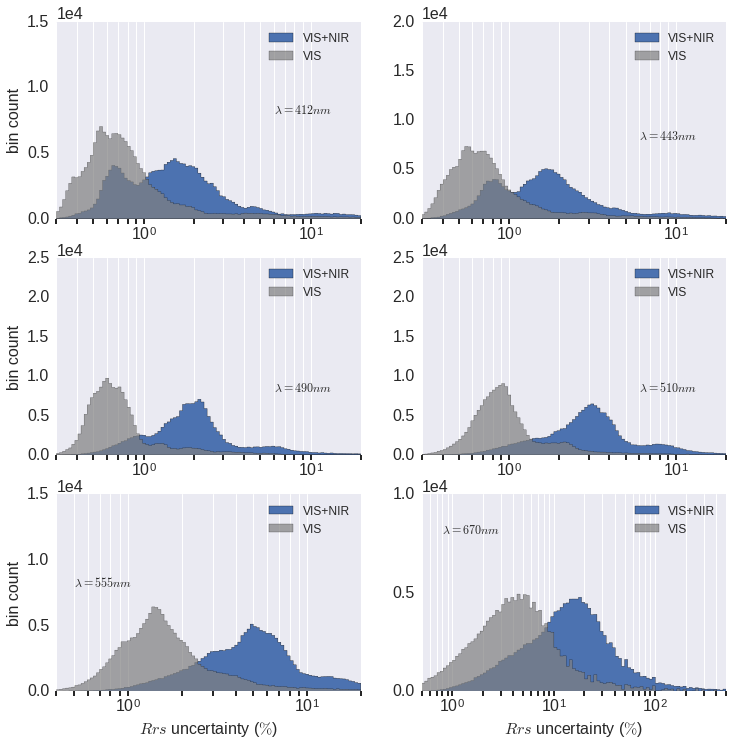

In [26]:
sb.set_style('dark')
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['xtick.direction'] = 'Down'
fig,axs = pl.subplots(nrows=figRows,ncols=figCols,figsize=(12,12))
rngDict={'412':(3e-1,20),'443':(3e-1,20),'490':(3e-1,20),
         '510':(3e-1,20),'555':(4e-1,20),'670':(5e-1,500)}
txtyDict={'412':(6,8e3),'443':(6,8e3),'490':(6,8e3),
         '510':(6,8e3),'555':(5e-1,8e3),'670':(0.8,8e3)}
yTicDict={'412':np.arange(0,1.6e4,5e3),'443':np.arange(0,2.1e4,5e3),
          '490':np.arange(0,2.6e4,5e3),'510':np.arange(0,2.6e4,5e3),
          '555':np.arange(0,1.6e4,5e3),'670':np.arange(0,1.2e4,5e3)}
for i in range(figRows):
    for j in range(figCols):
        bnd=reshBands[i,j]
        ytic=yTicDict[bnd]
        rrsRng=rngDict[bnd]
        logbins=np.logspace(np.log10(rrsRng[0]),np.log10(rrsRng[1]),100)
        axs[i,j].hist(rrs[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',label='VIS+NIR')
        axs[i,j].hist(rrsPercUncVisDict[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',color='gray',alpha=0.7,label='VIS')
        axs[i,j].set_xlim(rrsRng)
        axs[i,j].set_xscale('log')
        axs[i,j].legend(loc='best',fontsize=12)
        tx,ty=txtyDict[bnd]
        axs[i,j].annotate(r'$\lambda=%snm$' % bnd,xy=(tx,ty),fontsize=12)
        if j==0:
            axs[i,j].set_ylabel('bin count',fontsize=fontSize)
        if i == (figRows-1):
            axs[i,j].set_xlabel(r'$Rrs$ uncertainty ($\%$)',fontsize=fontSize)
            
        axs[i,j].xaxis.grid(True, which='minor') 
        axs[i,j].yaxis.set_ticks(ytic)
        axs[i,j].ticklabel_format(axis='y',style='sci',scilimits=(1,4))
        minorLocator=LogLocator(subs=np.arange(2,11)/10)
        axs[i,j].xaxis.set_minor_locator(minorLocator)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].xaxis.set_ticks_position('bottom')
fig.savefig('/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/Analyses/IPyNBs_And_Figs/NEW_FullScaleVisVsVisNIR/Vis_vs_VISNIRminorticks0.pdf')

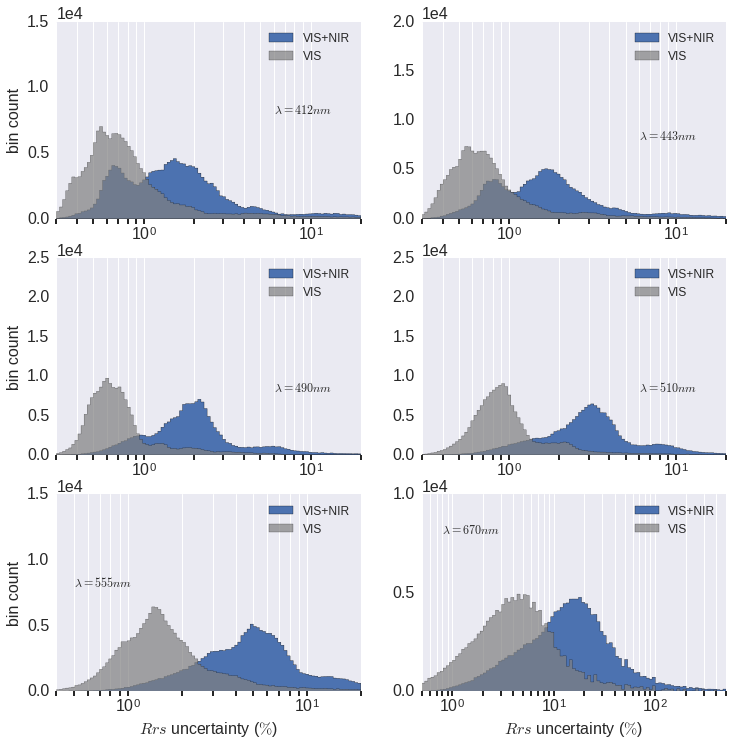

In [26]:
sb.set_style('dark')
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['xtick.direction'] = 'Down'
fig,axs = pl.subplots(nrows=figRows,ncols=figCols,figsize=(12,12))
rngDict={'412':(3e-1,20),'443':(3e-1,20),'490':(3e-1,20),
         '510':(3e-1,20),'555':(4e-1,20),'670':(5e-1,500)}
txtyDict={'412':(6,8e3),'443':(6,8e3),'490':(6,8e3),
         '510':(6,8e3),'555':(5e-1,8e3),'670':(0.8,8e3)}
yTicDict={'412':np.arange(0,1.6e4,5e3),'443':np.arange(0,2.1e4,5e3),
          '490':np.arange(0,2.6e4,5e3),'510':np.arange(0,2.6e4,5e3),
          '555':np.arange(0,1.6e4,5e3),'670':np.arange(0,1.2e4,5e3)}
for i in range(figRows):
    for j in range(figCols):
        bnd=reshBands[i,j]
        ytic=yTicDict[bnd]
        rrsRng=rngDict[bnd]
        logbins=np.logspace(np.log10(rrsRng[0]),np.log10(rrsRng[1]),100)
        axs[i,j].hist(rrsPercUncStdDict[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',label='VIS+NIR')
        axs[i,j].hist(rrsPercUncVisDict[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',color='gray',alpha=0.7,label='VIS')
        axs[i,j].set_xlim(rrsRng)
        axs[i,j].set_xscale('log')
        axs[i,j].legend(loc='best',fontsize=12)
        tx,ty=txtyDict[bnd]
        axs[i,j].annotate(r'$\lambda=%snm$' % bnd,xy=(tx,ty),fontsize=12)
        if j==0:
            axs[i,j].set_ylabel('bin count',fontsize=fontSize)
        if i == (figRows-1):
            axs[i,j].set_xlabel(r'$Rrs$ uncertainty ($\%$)',fontsize=fontSize)
            
        axs[i,j].xaxis.grid(True, which='minor') 
        axs[i,j].yaxis.set_ticks(ytic)
        axs[i,j].ticklabel_format(axis='y',style='sci',scilimits=(1,4))
        minorLocator=LogLocator(subs=np.arange(2,11)/10)
        axs[i,j].xaxis.set_minor_locator(minorLocator)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].xaxis.set_ticks_position('bottom')
fig.savefig('/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/Analyses/IPyNBs_And_Figs/NEW_FullScaleVisVsVisNIR/Vis_vs_VISNIRminorticks0.pdf')

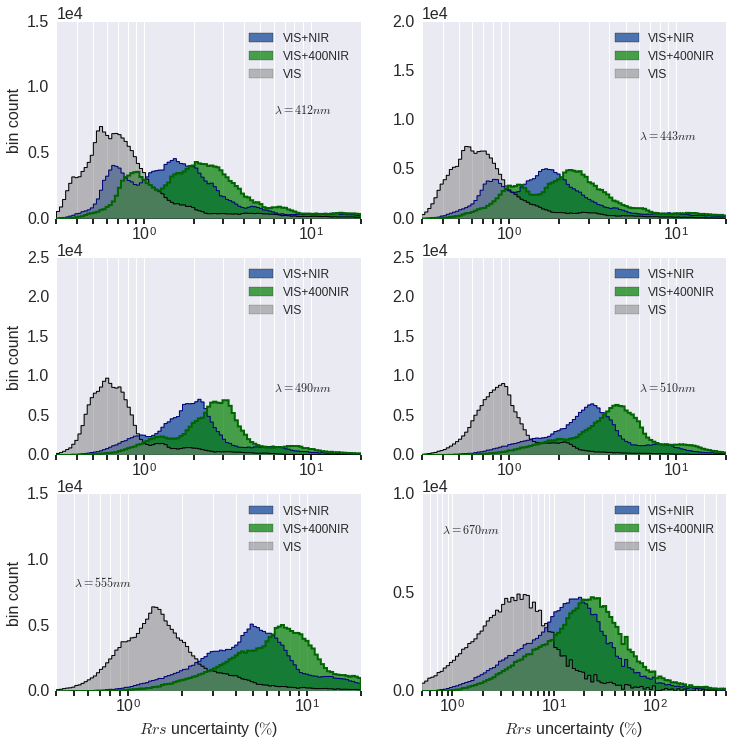

In [17]:
sb.set_style('dark')
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['xtick.direction'] = 'Down'
fig,axs = pl.subplots(nrows=figRows,ncols=figCols,figsize=(12,12))
rngDict={'412':(3e-1,20),'443':(3e-1,20),'490':(3e-1,20),
         '510':(3e-1,20),'555':(4e-1,20),'670':(5e-1,500)}
txtyDict={'412':(6,8e3),'443':(6,8e3),'490':(6,8e3),
         '510':(6,8e3),'555':(5e-1,8e3),'670':(0.8,8e3)}
yTicDict={'412':np.arange(0,1.6e4,5e3),'443':np.arange(0,2.1e4,5e3),
          '490':np.arange(0,2.6e4,5e3),'510':np.arange(0,2.6e4,5e3),
          '555':np.arange(0,1.6e4,5e3),'670':np.arange(0,1.2e4,5e3)}
for i in range(figRows):
    for j in range(figCols):
        bnd=reshBands[i,j]
        ytic=yTicDict[bnd]
        rrsRng=rngDict[bnd]
        logbins=np.logspace(np.log10(rrsRng[0]),np.log10(rrsRng[1]),100)
        axs[i,j].hist(rrsPercUncStdDict[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',label='VIS+NIR')
        axs[i,j].hist(rrsPercUncNir400Dict[bnd],bins=logbins,range=rrsRng,
                     histtype='stepfilled',color='green',alpha=0.7,label='VIS+400NIR')
        axs[i,j].hist(rrsPercUncVisDict[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',color='gray',alpha=0.5,label='VIS')
        # dark lines to make the histograms more visible
        axs[i,j].hist(rrsPercUncVisDict[bnd],bins=logbins,range=rrsRng,
                     histtype='step',color='k',linewidth=1)
        axs[i,j].hist(rrsPercUncStdDict[bnd],bins=logbins,range=rrsRng,
                     histtype='step',color='navy',linewidth=1)
        axs[i,j].hist(rrsPercUncNir400Dict[bnd],bins=logbins,range=rrsRng,
                     histtype='step',color='darkgreen',linewidth=2)
        axs[i,j].set_xlim(rrsRng)
        axs[i,j].set_xscale('log')
        axs[i,j].legend(loc='best',fontsize=12)
        tx,ty=txtyDict[bnd]
        axs[i,j].annotate(r'$\lambda=%snm$' % bnd,xy=(tx,ty),fontsize=12)
        if j==0:
            axs[i,j].set_ylabel('bin count',fontsize=fontSize)
        if i == (figRows-1):
            axs[i,j].set_xlabel(r'$Rrs$ uncertainty ($\%$)',fontsize=fontSize)
            
        axs[i,j].xaxis.grid(True, which='minor') 
        axs[i,j].yaxis.set_ticks(ytic)
        axs[i,j].ticklabel_format(axis='y',style='sci',scilimits=(1,4))
        minorLocator=LogLocator(subs=np.arange(2,11)/10)
        axs[i,j].xaxis.set_minor_locator(minorLocator)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].xaxis.set_ticks_position('bottom')
savename = 'FS_Vis_vs_600_NIR_vs_400_NIR' 
fig.savefig('./PACEREVIEWFIGS/' + savename,format='png')

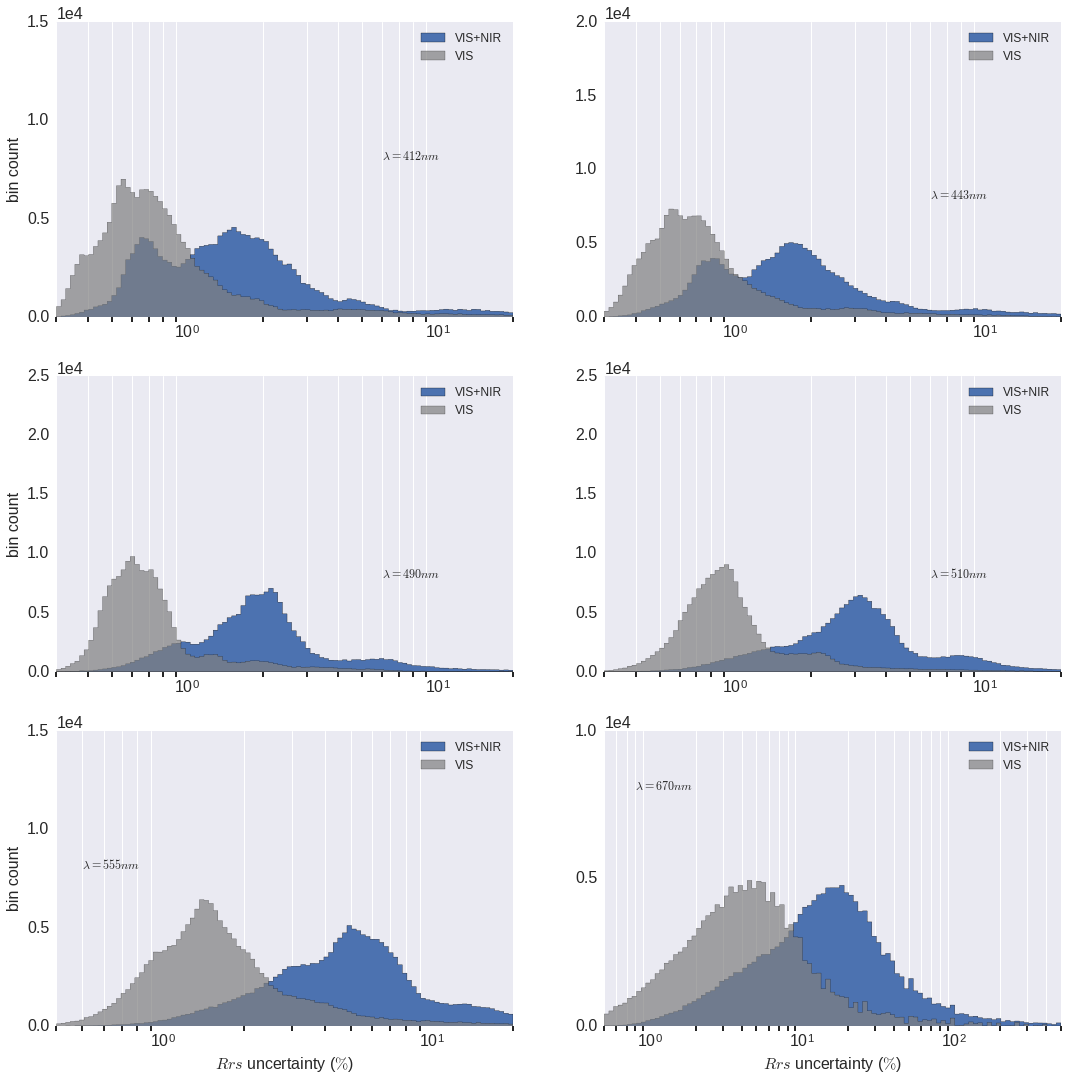

In [24]:
minorLocator=LogLocator(subs=[0.5,0.7])
sb.set_style('dark')
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['xtick.direction'] = 'Down'
fig,axs = pl.subplots(nrows=figRows,ncols=figCols,figsize=(18,18))
rngDict={'412':(3e-1,20),'443':(3e-1,20),'490':(3e-1,20),
         '510':(3e-1,20),'555':(4e-1,20),'670':(5e-1,500)}
txtyDict={'412':(6,8e3),'443':(6,8e3),'490':(6,8e3),
         '510':(6,8e3),'555':(5e-1,8e3),'670':(0.8,8e3)}
yTicDict={'412':np.arange(0,1.6e4,5e3),'443':np.arange(0,2.1e4,5e3),
          '490':np.arange(0,2.6e4,5e3),'510':np.arange(0,2.6e4,5e3),
          '555':np.arange(0,1.6e4,5e3),'670':np.arange(0,1.2e4,5e3)}

for i in range(figRows):
    for j in range(figCols):
        bnd=reshBands[i,j]
        ytic=yTicDict[bnd]
        rrsRng=rngDict[bnd]
        logbins=np.logspace(np.log10(rrsRng[0]),np.log10(rrsRng[1]),100)
        axs[i,j].hist(rrsPercUncStdDict[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',label='VIS+NIR')
        axs[i,j].hist(rrsPercUncVisDict[bnd],bins=logbins,range=rrsRng,
                  histtype='stepfilled',color='gray',alpha=0.7,label='VIS')
        axs[i,j].set_xlim(rrsRng)
        axs[i,j].set_xscale('log')
        axs[i,j].legend(loc='best',fontsize=12)
        tx,ty=txtyDict[bnd]
        axs[i,j].annotate(r'$\lambda=%snm$' % bnd,xy=(tx,ty),fontsize=12)
        if j==0:
            axs[i,j].set_ylabel('bin count',fontsize=fontSize)
        if i == (figRows-1):
            axs[i,j].set_xlabel(r'$Rrs$ uncertainty ($\%$)',fontsize=fontSize)
        axs[i,j].xaxis.grid(True, which='minor') 
        axs[i,j].yaxis.set_ticks(ytic)
        axs[i,j].ticklabel_format(axis='y',style='sci',scilimits=(1,4))
        minorLocator=LogLocator(subs=np.arange(2,10)/10)
        axs[i,j].xaxis.set_minor_locator(minorLocator)
        axs[i,j].spines['top'].set_visible(False)
        axs[i,j].xaxis.set_ticks_position('bottom')
#fig.savefig('/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/Analyses/IPyNBs_And_Figs/NEW_FullScaleVisVsVisNIR/Vis_vs_VISNIRminorticks.pdf')

In [18]:
14/27

0.5185185185185185